In [4]:
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import os
import numpy as np
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import random
from PIL import Image
import shutil
import time
import os
from glob import glob
import cv2 as cv2
import os
import shutil
from glob import glob
import numpy as np

import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D, Multiply, Conv2D, Activation, BatchNormalization
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

In [2]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the original dataset
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/GroundTruth.csv')

In [3]:
# import os
# import shutil
# import zipfile

# # Define the target directory
# target_dir = "/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/isic2019"
# os.makedirs(target_dir, exist_ok=True)

# # Function to download and extract Kaggle datasets
# def download_and_extract_kaggle_dataset(dataset_name, target_path):
#     !kaggle datasets download -d {dataset_name}
#     zip_file = dataset_name.split('/')[-1] + ".zip"
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(target_path)
#     os.remove(zip_file)

# # List of datasets to download
# datasets = [
#     "ahdasdwdasd/our-normal-skin",
#     "surajghuwalewala/ham1000-segmentation-and-classification",
#     "thanatw/isic2019-modded"
# ]

# # Download and extract each dataset
# for dataset in datasets:
#     download_and_extract_kaggle_dataset(dataset, target_dir)

# print("Datasets downloaded and extracted successfully.")


Dataset URL: https://www.kaggle.com/datasets/ahdasdwdasd/our-normal-skin
License(s): unknown
 45% 5.00M/11.1M [00:00<00:00, 33.8MB/s]
100% 11.1M/11.1M [00:00<00:00, 60.8MB/s]
Dataset URL: https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 2.57G/2.59G [00:33<00:00, 108MB/s]
100% 2.59G/2.59G [00:33<00:00, 83.1MB/s]
Dataset URL: https://www.kaggle.com/datasets/thanatw/isic2019-modded
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 7.09G/7.09G [01:16<00:00, 65.7MB/s]
100% 7.09G/7.09G [01:16<00:00, 99.0MB/s]
Datasets downloaded and extracted successfully.


In [7]:
import os
import shutil

# Define the source and target directories
source_dir = "/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All"
target_dir = os.path.join(source_dir, "our_normal_skin")

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Move all files from source_dir to target_dir
for item in os.listdir(source_dir):
    item_path = os.path.join(source_dir, item)
    if os.path.isfile(item_path):  # Check if it's a file
        shutil.move(item_path, target_dir)

print("All images have been moved to our_normal_skin directory.")


All images have been moved to our_normal_skin directory.


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/our_normal_skin/GroundTruth.csv')

In [4]:
data.head(2)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Add 'Normal' to the dataset, assuming we are appending it directly
data['Class'] = data.iloc[:, 1:].idxmax(axis=1)  # This assumes the first column is an ID and the rest are conditions


In [6]:

data.head(2)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,Class
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NV


In [12]:
import os
import shutil
import pandas as pd
from tqdm import tqdm

# Assuming 'data' is a DataFrame that includes 'image' and 'Class' columns
# Example: data = pd.read_csv('/path/to/your/data.csv')

# Define the base directory
base_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/train3'
lesion_types = data['Class'].unique().tolist() + ['Normal']  # Add 'Normal'

# Create directories for each class plus 'Normal'
for lesion_type in lesion_types:
    os.makedirs(os.path.join(base_dir, lesion_type), exist_ok=True)

# Define batch size
batch_size = 1000  # Adjust the batch size as needed

# Function to move images in batches
def move_images_batch(data_batch):
    for index, row in tqdm(data_batch.iterrows(), total=data_batch.shape[0], desc="Moving Images"):
        file_path = f"/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/images/{row['image']}.jpg"
        if os.path.exists(file_path):
            shutil.copy(file_path, os.path.join(base_dir, row['Class']))

# Process the data in batches
num_batches = (len(data) // batch_size) + 1
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    data_batch = data[start_idx:end_idx]
    move_images_batch(data_batch)

print("All images have been moved to their respective directories.")


Moving Images: 100%|██████████| 15/15 [00:00<00:00, 48.44it/s]

All images have been moved to their respective directories.


In [13]:
import os
import shutil
from tqdm import tqdm

# Define the directories containing normal images
normal_dirs = [
    '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/train/Normal',
    '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/our_normal_skin'
]

# Define the target directory for normal images
target_dir = os.path.join(base_dir, 'Normal')
os.makedirs(target_dir, exist_ok=True)

# Function to copy files with progress bar
def copy_files_with_progress(source_dir, target_dir):
    files = os.listdir(source_dir)
    for file in tqdm(files, desc=f"Copying from {source_dir}"):
        shutil.copy(os.path.join(source_dir, file), target_dir)

# Copy normal images from each directory
for ndir in normal_dirs:
    copy_files_with_progress(ndir, target_dir)

print("All normal images have been copied to the 'Normal' directory.")


Copying from /content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/train/Normal: 100%|██████████| 583/583 [00:13<00:00, 41.83it/s]
Copying from /content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/our_normal_skin: 100%|██████████| 125/125 [00:03<00:00, 35.54it/s]

All normal images have been copied to the 'Normal' directory.


In [14]:
source_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/train3'
target_dir_train = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/train_set'
target_dir_val = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'

os.makedirs(target_dir_train, exist_ok=True)
os.makedirs(target_dir_val, exist_ok=True)

def restrict_images_per_class(source, target_train, target_val, max_images=300, val_percent=0.1):
    class_counts = {}
    for class_folder in os.listdir(source):
        class_path = os.path.join(source, class_folder)
        images = glob(os.path.join(class_path, '*.jpg'))  # Adjust the pattern if different format
        np.random.shuffle(images)  # Shuffle to randomize selection

        # Limit to max_images if there are more than that
        limited_images = images[:max_images]
        num_val = int(len(limited_images) * val_percent)  # 20% of the limited images for validation

        # Separate out the validation and training images
        validation_images = limited_images[:num_val]
        training_images = limited_images[num_val:]

        # Create target directories for class
        target_train_class_path = os.path.join(target_train, class_folder)
        target_val_class_path = os.path.join(target_val, class_folder)
        os.makedirs(target_train_class_path, exist_ok=True)
        os.makedirs(target_val_class_path, exist_ok=True)

        # Copy validation images
        for img_path in validation_images:
            shutil.copy(img_path, target_val_class_path)

        # Copy training images
        for img_path in training_images:
            shutil.copy(img_path, target_train_class_path)

        # Record the number of images used for training
        class_counts[class_folder] = len(training_images)

    return class_counts

class_counts_train = restrict_images_per_class(source_dir, target_dir_train, target_dir_val)


In [15]:
class_counts_train

{'NV': 270,
 'MEL': 270,
 'BKL': 270,
 'DF': 104,
 'AKIEC': 270,
 'BCC': 270,
 'VASC': 128,
 'Normal': 270}

In [8]:
def count_files_in_classes(directory):
    class_file_counts = {}
    for class_folder in os.listdir(directory):
        class_path = os.path.join(directory, class_folder)
        # Count all .jpg files; modify the pattern if using different file types
        file_count = len(glob(os.path.join(class_path, '*.jpg')))
        class_file_counts[class_folder] = file_count
    return class_file_counts

# Paths to the training and validation directories
train_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/train_set'
val_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'

# Count files in each directory
train_class_counts = count_files_in_classes(train_dir)
val_class_counts = count_files_in_classes(val_dir)

# Print the results
print("Training Set Class Counts:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count} files")

print("\nValidation Set Class Counts:")
for class_name, count in val_class_counts.items():
    print(f"{class_name}: {count} files")


Training Set Class Counts:
NV: 270 files
MEL: 270 files
BKL: 270 files
DF: 104 files
AKIEC: 270 files
BCC: 270 files
VASC: 128 files
Normal: 270 files

Validation Set Class Counts:
NV: 30 files
MEL: 30 files
BKL: 30 files
DF: 11 files
AKIEC: 30 files
BCC: 30 files
VASC: 14 files
Normal: 30 files


In [7]:
height=224  # image height
width=224   # image width
channels=3  # number of coloor channels
batch_size=40  # model batch size for training and evaluation
img_shape=(height, width, channels)
img_size=(height, width)

In [8]:
def load_images_and_labels(base_dir, img_size=(256, 256), augment=False):
    images = []
    labels = []
    class_names = sorted(os.listdir(base_dir))  # Ensure that the order is consistent
    class_indices = {name: index for index, name in enumerate(class_names)}

    for folder in class_names:
        folder_path = os.path.join(base_dir, folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = load_img(img_path, color_mode='rgb', target_size=img_size)  # Corrected color_mode to 'rgb'
            img_array = img_to_array(img)

            if augment:
                img_array = apply_random_transformations(img_array)

            images.append(img_array)
            labels.append(class_indices[folder])

    images = np.array(images, dtype='float32') / 255.0  # Normalize the images
    labels = to_categorical(labels, num_classes=len(class_names))  # Convert labels to one-hot encoding

    return images, labels, class_indices

def apply_random_transformations(image):
    image = Image.fromarray(np.uint8(image))  # Convert to PIL image for transformations
    # Random flip
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_TOP_BOTTOM)

    # Random rotation
    rotation = random.choice([0, 90, 180, 270])
    image = image.rotate(rotation)

    return np.array(image)

# Specify the paths to your training and validation sets
train_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/train_set'
val_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'

# Load training and validation data with augmentation for training data
train_images, train_labels, train_class_indices = load_images_and_labels(train_dir, augment=True)
val_images, val_labels, val_class_indices = load_images_and_labels(val_dir)

print("Training and validation data loaded successfully.")


Training and validation data loaded successfully.


In [9]:
# Assuming train_labels are already available as one-hot encoded arrays
# Convert one-hot encoded train_labels to integer class labels
train_labels_int = np.argmax(train_labels, axis=1)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_int),
    y=train_labels_int
)

# Convert class weights to a dictionary to pass to model.fit
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}

print("Class weights:", class_weight_dict)


Class weights: {0: 0.8574074074074074, 1: 0.8574074074074074, 2: 0.8574074074074074, 3: 2.2259615384615383, 4: 0.8574074074074074, 5: 0.8574074074074074, 6: 0.8574074074074074, 7: 1.80859375}


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Multiply, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = tf.keras.metrics.Precision()(y_true, y_pred)
    recall = tf.keras.metrics.Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [19]:
def build_attention_model(input_shape=(256, 256, 1), num_classes=8):
    base_model = EfficientNetB1(include_top=False, weights="imagenet", input_shape=(input_shape[0], input_shape[1], 3))

    # Regularizer configuration
    reg = l2(0.01)

    # Feature extraction from the base model
    x = base_model.output

    # Attention Layer
    attention_probs = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)  # Single channel attention map
    x = Multiply()([x, attention_probs])  # Modulate features with the attention map

    # Pooling features
    x = GlobalAveragePooling2D()(x)

    # Adding regularized dense layers
    x = Dense(256, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Additional dense layer for more regularization
    x = Dense(128, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Output layer
    predictions = Dense(num_classes, activation='softmax', kernel_regularizer=reg)(x)

    # Constructing the final model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model with the attention mechanism and enhanced regularization
model_with_attention = build_attention_model()

# Display the model summary to check the architecture
# model_with_attention.summary()


In [20]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Adjust based on the sensitivity of your model's training dynamics
    verbose=1,
    restore_best_weights=True
)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# ReduceLROnPlateau to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reduce the learning rate by 20% if no improvement seen
    patience=5,
    min_lr=0.00001,  # Minimum learning rate to drop to
    verbose=1
)

# Train the model with these callbacks
history2 = model_with_attention.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=16,
    validation_data=(val_images, val_labels),
    class_weight=class_weight_dict,  # Include class weights if class imbalance is an issue
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 8.1181 - accuracy: 0.3072
Epoch 1: val_loss improved from inf to 7.68319, saving model to best_model.keras
116/116 [==============================] - 99s 340ms/step - loss: 8.1181 - accuracy: 0.3072 - val_loss: 7.6832 - val_accuracy: 0.1463 - lr: 0.0010
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 6.6657 - accuracy: 0.4136
Epoch 2: val_loss did not improve from 7.68319
116/116 [==============================] - 29s 254ms/step - loss: 6.6657 - accuracy: 0.4136 - val_loss: 10.2377 - val_accuracy: 0.1463 - lr: 0.0010
Epoch 3/50
116/116 [==============================] - ETA: 0s - loss: 5.3517 - accuracy: 0.5092
Epoch 3: val_loss did not improve from 7.68319
116/116 [==============================] - 30s 260ms/step - loss: 5.3517 - accuracy: 0.5092 - val_loss: 8.0798 - val_accuracy: 0.1366 - lr: 0.0010
Epoch 4/50
116/116 [==============================] - ETA: 0s - loss: 4.2846 - accuracy: 0.5643

In [21]:
history2


NameError: name 'history2' is not defined

7/7 [==============================] - 6s 87ms/step


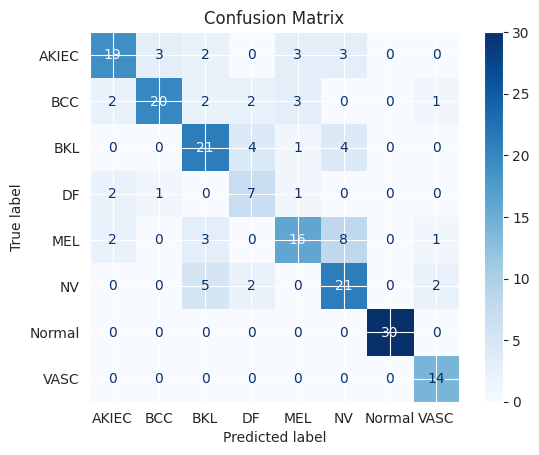

Classification Report:
              precision    recall  f1-score   support

       AKIEC       0.76      0.63      0.69        30
         BCC       0.83      0.67      0.74        30
         BKL       0.64      0.70      0.67        30
          DF       0.47      0.64      0.54        11
         MEL       0.67      0.53      0.59        30
          NV       0.58      0.70      0.64        30
      Normal       1.00      1.00      1.00        30
        VASC       0.78      1.00      0.88        14

    accuracy                           0.72       205
   macro avg       0.72      0.73      0.72       205
weighted avg       0.73      0.72      0.72       205



In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the test data
# Assuming test_images and test_labels are prepared similarly to train_images and val_images
test_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'  # Adjust the path as needed

# Load test images and labels
test_images, test_labels, test_class_indices = load_images_and_labels(test_dir)
test_labels_int = np.argmax(test_labels, axis=1)

# Make predictions on the test set
predictions = model_with_attention.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the confusion matrix
conf_matrix = confusion_matrix(test_labels_int, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(test_class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
class_report = classification_report(test_labels_int, predicted_labels, target_names=list(test_class_indices.keys()))
print("Classification Report:")
print(class_report)

# You can also save the classification report to a file if needed
with open('classification_report.txt', 'w') as f:
    f.write(class_report)


7/7 [==============================] - 1s 102ms/step


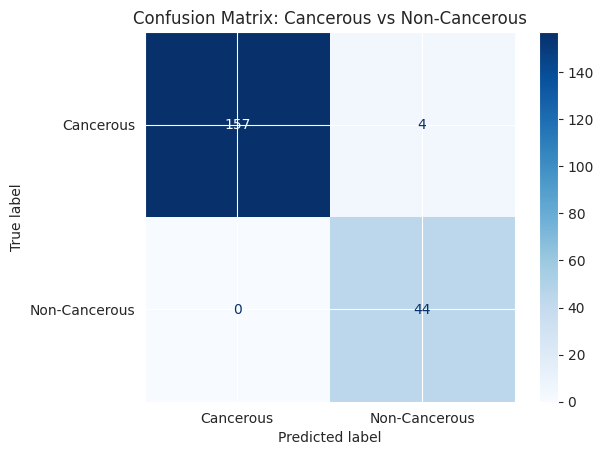

Classification Report:
               precision    recall  f1-score   support

    Cancerous       1.00      0.98      0.99       161
Non-Cancerous       0.92      1.00      0.96        44

     accuracy                           0.98       205
    macro avg       0.96      0.99      0.97       205
 weighted avg       0.98      0.98      0.98       205



In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the mapping of classes to cancerous and non-cancerous
cancerous_classes = ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV']
non_cancerous_classes = ['Normal', 'VASC']
class_mapping = {class_name: 'Cancerous' for class_name in cancerous_classes}
class_mapping.update({class_name: 'Non-Cancerous' for class_name in non_cancerous_classes})

# Function to map original labels to cancerous and non-cancerous
def map_labels(labels, mapping):
    return [mapping[label] for label in labels]

# Load the test data
test_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'  # Adjust the path as needed

# Load test images and labels
test_images, test_labels, test_class_indices = load_images_and_labels(test_dir)
test_labels_int = np.argmax(test_labels, axis=1)
test_labels_str = [list(test_class_indices.keys())[i] for i in test_labels_int]

# Make predictions on the test set
predictions = model_with_attention.predict(test_images)
predicted_labels_int = np.argmax(predictions, axis=1)
predicted_labels_str = [list(test_class_indices.keys())[i] for i in predicted_labels_int]

# Map the original labels to cancerous and non-cancerous
test_labels_mapped = map_labels(test_labels_str, class_mapping)
predicted_labels_mapped = map_labels(predicted_labels_str, class_mapping)

# Plot the confusion matrix
conf_matrix = confusion_matrix(test_labels_mapped, predicted_labels_mapped, labels=['Cancerous', 'Non-Cancerous'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cancerous', 'Non-Cancerous'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Cancerous vs Non-Cancerous')
plt.show()

# Print the classification report
class_report = classification_report(test_labels_mapped, predicted_labels_mapped, target_names=['Cancerous', 'Non-Cancerous'])
print("Classification Report:")
print(class_report)

# Save the classification report to a file if needed
with open('classification_report_cancerous_vs_noncancerous.txt', 'w') as f:
    f.write(class_report)


In [2]:
import os
import shutil
import pandas as pd
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Multiply, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the mapping of classes to cancerous and non-cancerous
cancerous_classes = ['AKIEC', 'BCC', 'BKL', 'DF', 'MEL', 'NV']
non_cancerous_classes = ['Normal', 'VASC']
class_mapping = {class_name: 'Cancerous' for class_name in cancerous_classes}
class_mapping.update({class_name: 'Non-Cancerous' for class_name in non_cancerous_classes})

# Function to map original labels to cancerous and non-cancerous
def map_labels(labels, mapping):
    return [mapping[label] for label in labels]


In [5]:

# Load images and labels with grouped labels
def load_images_and_labels_grouped(base_dir, img_size=(256, 256), augment=False):
    images = []
    labels = []
    class_names = sorted(os.listdir(base_dir))  # Ensure that the order is consistent
    class_indices = {name: index for index, name in enumerate(class_names)}

    for folder in class_names:
        folder_path = os.path.join(base_dir, folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = load_img(img_path, color_mode='rgb', target_size=img_size)  # Corrected color_mode to 'rgb'
            img_array = img_to_array(img)

            if augment:
                img_array = apply_random_transformations(img_array)

            images.append(img_array)
            labels.append(class_mapping[folder])

    images = np.array(images, dtype='float32') / 255.0  # Normalize the images
    labels = to_categorical([1 if label == 'Cancerous' else 0 for label in labels], num_classes=2)  # Convert labels to one-hot encoding

    return images, labels

def apply_random_transformations(image):
    image = Image.fromarray(np.uint8(image))  # Convert to PIL image for transformations
    # Random flip
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_LEFT_RIGHT)
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_TOP_BOTTOM)

    # Random rotation
    rotation = random.choice([0, 90, 180, 270])
    image = image.rotate(rotation)

    return np.array(image)

# Specify the paths to your training and validation sets
train_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/train_set'
val_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'

# Load training and validation data with augmentation for training data
train_images, train_labels = load_images_and_labels_grouped(train_dir, augment=True)
val_images, val_labels = load_images_and_labels_grouped(val_dir)

print("Training and validation data loaded successfully.")


Training and validation data loaded successfully.


In [6]:
# Calculate class weights
train_labels_int = np.argmax(train_labels, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels_int),
    y=train_labels_int
)

# Convert class weights to a dictionary to pass to model.fit
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}
print("Class weights:", class_weight_dict)


Class weights: {0: 2.3266331658291457, 1: 0.6368638239339752}


In [10]:
# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = tf.keras.metrics.Precision()(y_true, y_pred)
    recall = tf.keras.metrics.Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def build_attention_model(input_shape=(256, 256, 1), num_classes=2):
    base_model = EfficientNetB1(include_top=False, weights="imagenet", input_shape=(input_shape[0], input_shape[1], 3))

    # Regularizer configuration
    reg = l2(0.01)

    # Feature extraction from the base model
    x = base_model.output

    # Attention Layer
    attention_probs = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)  # Single channel attention map
    x = Multiply()([x, attention_probs])  # Modulate features with the attention map

    # Pooling features
    x = GlobalAveragePooling2D()(x)

    # Adding regularized dense layers
    x = Dense(256, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Additional dense layer for more regularization
    x = Dense(128, activation='relu', kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # Output layer
    predictions = Dense(num_classes, activation='softmax', kernel_regularizer=reg)(x)

    # Constructing the final model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model with the attention mechanism and enhanced regularization
model_with_attention = build_attention_model()


In [11]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Adjust based on the sensitivity of your model's training dynamics
    verbose=1,
    restore_best_weights=True
)

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# ReduceLROnPlateau to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reduce the learning rate by 20% if no improvement seen
    patience=5,
    min_lr=0.00001,  # Minimum learning rate to drop to
    verbose=1
)

# Train the model with these callbacks
history4 = model_with_attention.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=16,
    validation_data=(val_images, val_labels),
    class_weight=class_weight_dict,  # Include class weights if class imbalance is an issue
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/50
116/116 [==============================] - ETA: 0s - loss: 5.9211 - accuracy: 0.7279
Epoch 1: val_loss improved from inf to 9.32168, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


116/116 [==============================] - 98s 324ms/step - loss: 5.9211 - accuracy: 0.7279 - val_loss: 9.3217 - val_accuracy: 0.2146 - lr: 0.0010
Epoch 2/50
116/116 [==============================] - ETA: 0s - loss: 4.0395 - accuracy: 0.8877
Epoch 2: val_loss did not improve from 9.32168
116/116 [==============================] - 30s 260ms/step - loss: 4.0395 - accuracy: 0.8877 - val_loss: 12.2730 - val_accuracy: 0.2146 - lr: 0.0010
Epoch 3/50
116/116 [==============================] - ETA: 0s - loss: 2.7608 - accuracy: 0.9271
Epoch 3: val_loss did not improve from 9.32168
116/116 [==============================] - 29s 253ms/step - loss: 2.7608 - accuracy: 0.9271 - val_loss: 41.8772 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 4/50
116/116 [==============================] - ETA: 0s - loss: 1.8063 - accuracy: 0.9595
Epoch 4: val_loss did not improve from 9.32168
116/116 [==============================] - 30s 257ms/step - loss: 1.8063 - accuracy: 0.9595 - val_loss: 18.8443 - val_accuracy: 

In [12]:
# Load the test data
test_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/restricted3/val_set'  # Adjust the path as needed

# Load test images and labels
test_images, test_labels = load_images_and_labels_grouped(test_dir)
test_labels_int = np.argmax(test_labels, axis=1)


In [15]:
# Make predictions on the test set
predictions = model_with_attention.predict(test_images)
predicted_labels_int = np.argmax(predictions, axis=1)

# Map the integer labels back to cancerous and non-cancerous
int_to_class = {1: 'Cancerous', 0: 'Non-Cancerous'}
test_labels_str = [int_to_class[i] for i in test_labels_int]
predicted_labels_str = [int_to_class[i] for i in predicted_labels_int]


7/7 [==============================] - 1s 112ms/step


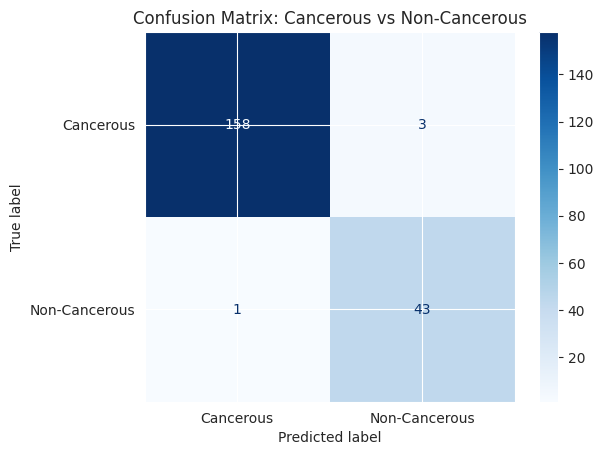

Classification Report:
               precision    recall  f1-score   support

    Cancerous       0.99      0.98      0.99       161
Non-Cancerous       0.93      0.98      0.96        44

     accuracy                           0.98       205
    macro avg       0.96      0.98      0.97       205
 weighted avg       0.98      0.98      0.98       205



In [16]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(test_labels_str, predicted_labels_str, labels=['Cancerous', 'Non-Cancerous'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Cancerous', 'Non-Cancerous'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Cancerous vs Non-Cancerous')
plt.show()

# Print the classification report
class_report = classification_report(test_labels_str, predicted_labels_str, target_names=['Cancerous', 'Non-Cancerous'])
print("Classification Report:")
print(class_report)

# Save the classification report to a file if needed
with open('classification_report_cancerous_vs_noncancerous.txt', 'w') as f:
    f.write(class_report)

In [17]:
from tensorflow.keras.models import load_model

# Load the existing .keras model
model_path_keras = '/content/best_model.keras'
model_path_h5 = '/content/best_model.h5'

# Load the models
model_keras = load_model(model_path_keras)
model_h5 = load_model(model_path_h5)

# Define the target directories and filenames
deployment_dir = '/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/Deployments'
os.makedirs(deployment_dir, exist_ok=True)

model_for_lesion_path = os.path.join(deployment_dir, 'Model_for_lesion.h5')
model_for_cancer_path = os.path.join(deployment_dir, 'Model_for_cancer.h5')

# Save the models in .h5 format
model_keras.save(model_for_lesion_path)
model_h5.save(model_for_cancer_path)

print(f"Model_for_lesion saved to {model_for_lesion_path}")
print(f"Model_for_cancer saved to {model_for_cancer_path}")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model_for_lesion saved to /content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/Deployments/Model_for_lesion.h5
Model_for_cancer saved to /content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/Deployments/Model_for_cancer.h5


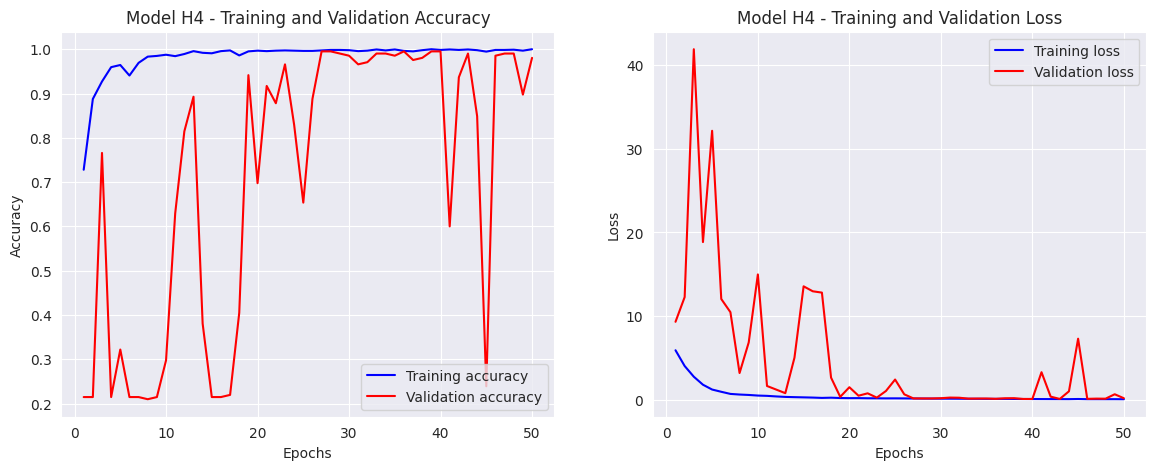

In [22]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming h2 and h3 are the history objects for the two models
#plot_training_history(history2, 'Model H2')
plot_training_history(history4, 'Model H4')


In [ ]:
model.save

In [ ]:
/content/best_model.keras

In [ ]:
/content/drive/MyDrive/Dataset/Skin_Lesion_Datasets/All/Deployments

In [ ]:
# !pip install tensorflow_addons


In [ ]:
# pip install streamlit tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from IPython.display import display
from ipywidgets import FileUpload
from IPython.display import clear_output

# Define the model loading function
def load_model():
    return tf.keras.models.load_model('/kaggle/working/best_model3.keras')

# Load the model
model = load_model()

# Create an upload button to upload images
upload = FileUpload(accept='image/*', multiple=False)

# Function to handle the image upload
def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename, file_info in up.value.items():
        img = load_img(file_info['content'], target_size=(256, 256))  # Adjust target_size to match your model's expected input
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)  # Model expects a batch dimension
        img_array /= 255.0  # Normalization (if needed)

        # Display the uploaded image
        display(img)

        # Make predictions
        prediction = model.predict(img_array)
        print(f'Prediction: {prediction}')  # You might want to adjust this part based on what you want to output

        # Clear the upload widget for the next upload
        up.value.clear()
        up._counter = 0

# Watch the upload widget for changes
upload.observe(on_upload_change, names='_counter')

# Display the upload widget
display(upload)


FileUpload(value={}, accept='image/*', description='Upload')

In [ ]:
# import streamlit as st
# import tensorflow as tf
# from PIL import Image, ImageOps
# import numpy as np

# # Load your model
# model = tf.keras.models.load_model('/kaggle/working/best_model.keras')

# def predict(image):
#     '''Process the image and predict the class.'''
#     # Resize to the input shape expected by the model
#     image = image.resize((256, 256))

#     # Convert to numpy, ensure it's float32 and expand dims to simulate batch
#     image = np.array(image).astype(np.float32)

#     # Normalize the image data to 0-1 range
#     image = image / 255.0

#     # If the image is grayscale, convert it to 3-channel (RGB) by repeating the channels
#     if image.ndim == 2 or (image.ndim == 3 and image.shape[-1] == 1):
#         image = np.stack((image,) * 3, axis=-1)  # Stack along the last dimension to get 3 channels

#     image = np.expand_dims(image, axis=0)  # Model expects a batch dimension

#     prediction = model.predict(image)
#     return prediction

# st.title('Lesion Detection App')

# uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])
# if uploaded_file is not None:
#     image = Image.open(uploaded_file).convert('L')  # Convert to grayscale
#     st.image(image, caption='Uploaded Image.', use_column_width=True)
#     st.write("")
#     st.write("Classifying...")
#     label = predict(image)
#     st.write(f'Prediction: {label}')


In [ ]:
!ngrok config add-authtoken 2VJXf1SjlcpG5WPLyrgDcEaM2ct_7KytqnABitp5VfqfxZCYf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml                                


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.83.51.35


In [ ]:

!ngrok http --domain=perfect-saved-beagle.ngrok-free.app 80


In [ ]:
# !npm install -g npm@latest
# !npm install -g localtunnel


In [ ]:
def load_model():
    return tf.keras.models.load_model('/kaggle/working/model2.h5')

model = load_model()

In [ ]:
%%writefile app.py


import streamlit as st
from PIL import Image
import numpy as np
import cv2

from tensorflow.keras.models import load_model

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np


# Load the model (ensure the path matches where your model is saved)
import tensorflow as tf

@st.cache(allow_output_mutation=True)
def load_model():
    return tf.keras.models.load_model('/kaggle/working/model2.h5', compile=False)

model = load_model()

def predict(image):
    '''Process the image and predict the class.'''
    image = image.resize((256, 256))  # Resize to match the input shape expected by the model
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = image / 255.0  # Normalize pixel values if your model expects values in [0, 1]

    prediction = model.predict(image)
    return np.argmax(prediction)  # Assuming your model outputs logits or probabilities

st.title('Lesion Detection App')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('RGB')  # Ensure image is in RGB
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    label = predict(image)
    st.write(f'Prediction: {label}')


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!pip install pyngrok
from pyngrok import ngrok


In [ ]:
!ngrok config add-authtoken 2c2M2FlQYv80TSFGhi8uPuoPkEa_53etdvNFKxW6rd5XvRRAh


/bin/bash: ngrok: command not found
